In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",45)
%matplotlib inline

In [2]:
#kdd_diff_level_train = pd.read_pickle("dataset/kdd_diff_level_train.pkl")
#kdd_diff_level_test = pd.read_pickle("dataset/kdd_diff_level_test.pkl")
#output_columns_2labels = ['Normal','Attack']
output_columns_2labels = ['Attack','Normal']
actual_value = pd.read_pickle("dataset/kdd_test_2labels_y.pkl");


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=4)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    label = [["\n True Positive", "\n False Negative \n Type II Error"],
             ["\n False Positive \n Type I Error", "\n True Negative"]
            ]
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        
        plt.text(j, i, "{} {}".format(cm[i, j].round(4), label[i][j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot(pred_value):
    from sklearn.metrics import confusion_matrix

    cm_2labels = confusion_matrix(y_pred = pred_value, y_true = actual_value)
    plt.figure(figsize=[6,6])
    plot_confusion_matrix(cm_2labels, output_columns_2labels, normalize = True)

In [4]:
def get_count(pred_value):
    difficulty = pd.DataFrame({"Actual":actual_value, "Predict":pred_value, "difficulty_level":kdd_diff_level_test})
    #difficulty = pd.concat(difficulty, pd.Data)
    difficulty['accuracy'] = None
    difficulty.ix[difficulty.Actual == difficulty.Predict, "accuracy"] = 'Correct'
    difficulty.ix[difficulty.Actual != difficulty.Predict, "accuracy"] = 'Incorrect'
    diff_group = difficulty.loc[:,["difficulty_level", "accuracy", "Predict"]].groupby(["difficulty_level", "accuracy"])
    total_correct = sum(difficulty.Actual == difficulty.Predict)
    total_records = difficulty.shape[0]
    total_incorrect = total_records - total_correct
    print("Total Records:{}".format(total_records))
    return diff_group.count()

In [19]:
def evaluate(pred_pkl, score_pkl):
    predictions = pd.read_pickle(pred_pkl)
    scores = pd.read_pickle(score_pkl)

    print(scores.sort_values("test_score", ascending=False))

    df_sorted = scores.sort_values("test_score", ascending=False).iloc[0,0:3]
    epoch = int(df_sorted['epoch'])
    n_o_f = int(df_sorted['no_of_features'])
    h_l = int(df_sorted['hidden_layers'])
    df_pred = predictions["{}_{}_{}".format(epoch,n_o_f,h_l)].round(2)
    Attack_index = actual_value == 0
    Normal_index = actual_value == 1

    #df_pred[Attack_index].plot(kind='line', figsize=(20,5), title="Prediction of Attack")
    #df_pred[Normal_index].plot(kind='line', figsize=(20,5), title="Prediction of Normal")
    
    
    pred_value = np.argmax(df_pred.values, axis=1)
    #plot(pred_value)

# Evaluating Dense Network

In [20]:
evaluate("dataset/tf_dense_only_nsl_kdd_predictions.pkl",
         "dataset/tf_dense_only_nsl_kdd_scores.pkl")

     epoch  no_of_features  hidden_layers  train_score  test_score
618    100              32              6     0.946341    0.868479
616    100              32              6     0.946579    0.868213
615    100              32              6     0.943721    0.868125
617    100              32              6     0.951659    0.867459
614    100              32              6     0.942372    0.867459
619    100              32              6     0.949754    0.866927
620    100              32              6     0.952453    0.864665
613    100              32              6     0.943880    0.864532
3      100               4              4     0.850452    0.864088
621    100              32              6     0.951262    0.862935
612    100              32              6     0.941261    0.862358
622    100              32              6     0.950389    0.862048
623    100              32              6     0.951500    0.860539
624    100              32              6     0.952056    0.85

In [7]:
#get_count(pred_value)
#dense_only_predictions

# Evaluating VAE with Softmax - Trained Together

     epoch  no_of_features  hidden_layers  train_score  test_score
97      50               8              2     0.913118    0.907470
98      50               8              2     0.914031    0.905296
143     50              16              2     0.891248    0.904587
144     50              16              2     0.881484    0.903123
145     50              16              2     0.888272    0.901925
165     50              32              2     0.888391    0.898643
191     50              32              2     0.889780    0.897312
111     50              16              2     0.894781    0.896292
96      50               8              2     0.915340    0.895227
198     50              32              2     0.851201    0.894384
140     50              16              2     0.897361    0.892388
142     50              16              2     0.896567    0.892300
94      50               8              2     0.901965    0.892300
283     50               8              4     0.877753    0.89

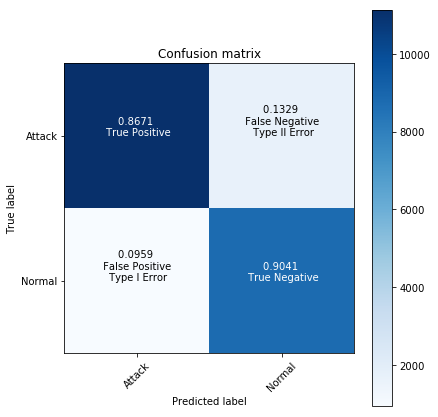

In [15]:
evaluate("dataset/tf_vae_dense_trained_together_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_dense_trained_together_nsl_kdd_scores.pkl")

# Evaluating VAE with Label using VAE Loss

     epoch  no_of_features  hidden_layers  train_score  test_score
366     50              32              4     0.906731    0.889771
368     50              32              4     0.906890    0.887376
367     50              32              4     0.910859    0.886977
364     50              32              4     0.911811    0.882408
357     50              32              4     0.912050    0.873625
371     50              32              4     0.914828    0.873581
358     50              32              4     0.916812    0.872250
363     50              32              4     0.920067    0.869544
360     50              32              4     0.900778    0.868435
365     50              32              4     0.889268    0.867060
361     50              32              4     0.906334    0.865774
362     50              32              4     0.908716    0.865729
391     50              32              4     0.918003    0.864532
390     50              32              4     0.919749    0.86

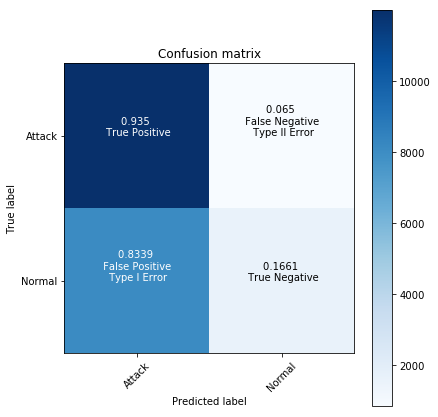

In [16]:
evaluate("dataset/tf_vae_only_vae_loss_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_only_vae_loss_nsl_kdd_scores.pkl")

# Evaluating VAE with Label using VAE Loss

     epoch  no_of_features  hidden_layers  train_score  test_score
279     50               8              4     0.948404    0.870076
337     50              16              4     0.831640    0.867947
338     50              16              4     0.830529    0.867903
341     50              16              4     0.793459    0.864044
105     50              16              2     0.865137    0.863999
340     50              16              4     0.794094    0.863999
219     50               4              4     0.928481    0.862225
278     50               8              4     0.941816    0.859164
357     50              32              4     0.914351    0.858588
356     50              32              4     0.911494    0.858277
333     50              16              4     0.827909    0.857656
358     50              32              4     0.926338    0.857612
334     50              16              4     0.829973    0.857567
339     50              16              4     0.826957    0.85

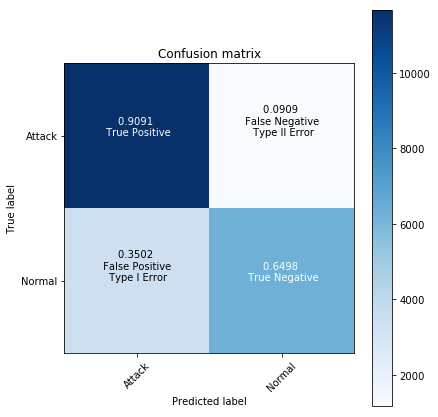

In [10]:
evaluate("dataset/tf_vae_only_nsl_kdd_predictions.pkl",
         "dataset/tf_vae_only_nsl_kdd_scores.pkl")